In [3]:
import pandas as pd
from geopy.geocoders import Nominatim
import time

## Scraping Coordinates of Sectors

In [14]:
sector_name = pd.read_csv('../Dataset/Processed/gurgaon_properties_post_feature_selection_v2.csv')['sector']

In [18]:
sector_name = sector_name.unique().tolist()

In [21]:
def get_coordinates(sector):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(f"{sector}, Gurgaon, India", timeout=10)
    if location:
        return location.latitude, location.longitude
    else:
        return None

In [22]:
# Create a DataFrame
df = pd.DataFrame(columns=["sector", "Latitude", "Longitude"])

# Iterate over sectors and fetch coordinates
for sector in sector_name:
    coordinates = get_coordinates(sector)
    if coordinates:
        latitude, longitude = coordinates
        df = pd.concat([df, pd.DataFrame({"sector": [f"{sector}"], "Latitude": [latitude], "Longitude": [longitude]})], ignore_index=True)
        print(f"{sector} added")
    else:
        print(f"Coordinates not found for Sector {sector}")
    time.sleep(1)  # To avoid hitting rate limits (1 request per second)

# Save DataFrame
df.to_csv("../Dataset/Raw/gurgaon_sectors_coordinate1.csv", index=False)

sector 36 added
sector 89 added
sohna road added
sector 92 added
sector 102 added
gwal pahari added
sector 108 added
sector 105 added
sector 26 added
sector 109 added
sector 28 added
sector 65 added
sector 12 added
sector 85 added
sector 70a added
sector 30 added
sector 107 added
sector 3 added
sector 2 added
sector 41 added
sector 4 added
sector 62 added
sector 49 added
sector 81 added
sector 66 added
sector 86 added
sector 48 added
sector 51 added
sector 37 added
sector 111 added
sector 67 added
sector 113 added
sector 13 added
sector 61 added
sector 69 added
Coordinates not found for Sector sector 67a
sector 37d added
sector 82 added
sector 53 added
sector 74 added
sector 52 added
sector 43 added
sector 14 added
sector 25 added
sector 95 added
sector 56 added
sector 83 added
sector 104 added
sector 88a added
sector 55 added
sector 50 added
sector 84 added
sector 91 added
sector 76 added
sector 82a added
sector 78 added
manesar added
sector 93 added
sector 7 added
sector 71 added
sec

In [114]:
df1 = pd.read_csv('../Dataset/Processed/gurgaon_properties_missing_value_imputation.csv')
df = pd.read_csv("../Dataset/Raw/gurgaon_sectors_coordinate1.csv")

In [115]:
new_df = df1.merge(df, on='sector')

In [116]:
new_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','Latitude','Longitude']]

/var/folders/z4/11lhzcvx4_j57cvc149hhsm80000gn/T/ipykernel_23582/1228347701.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','Latitude','Longitude']]


,price,price_per_sqft,built_up_area,Latitude,Longitude
sector,,,,,
dwarka expressway,1.372500,8988.375000,1606.000000,28.442668,76.960142
gwal pahari,3.192222,9585.777778,3056.166667,28.434507,77.144653
manesar,0.889524,4406.952381,1922.971429,28.361728,76.940215
sector 1,1.394375,6237.687500,2277.062500,28.360102,76.948375
sector 10,2.092857,11866.571429,1908.857143,28.444581,77.006023
...,...,...,...,...,...
sector 92,0.934000,5928.290000,1571.341800,28.408905,76.915523
sector 93,0.848889,8009.888889,1017.000000,28.415605,76.931638
sector 95,0.480545,5602.509091,995.981818,28.414944,76.911489


In [117]:
new_df.to_csv("../Dataset/Processed/properties-lat-long.csv", index=False)

## Word Cloud

In [33]:
import ast

In [25]:
df2 = pd.read_csv('../Dataset/Processed/gurgaon_properties_cleaned.csv')[['features','sector']]

In [42]:
df2 = df2.dropna()

In [108]:
# Convert string representation of list to actual list
df2['features'] = df2['features'].astype(str).apply(ast.literal_eval)

# Function to aggregate features for each sector
def aggregate_features(group):
    aggregated_features = []
    for features in group:
        aggregated_features.extend(features)
    return list(set(aggregated_features))  # Convert to set to remove duplicates, then back to list

# Group by 'sector' and aggregate features
grouped_df = df2.groupby('sector')['features'].apply(aggregate_features).reset_index()

# Print the resulting DataFrame
print(grouped_df)

                sector  \
0    dwarka expressway   
1          gwal pahari   
2              manesar   
3             sector 1   
4           sector 102   
..                 ...   
108          sector 99   
109         sector 99a   
110          sector 9a   
111         sohna road   
112    sohna road road   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 features  
0                                  

/var/folders/z4/11lhzcvx4_j57cvc149hhsm80000gn/T/ipykernel_23582/3039647434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['features'] = df2['features'].astype(str).apply(ast.literal_eval)


In [109]:
grouped_df['features'] = grouped_df['features'].apply(lambda x: ' '.join(x))
# Convert each row of 'features' to string and remove '/'
grouped_df['features'] = grouped_df['features'].apply(lambda x: str(x).replace('/', ''))

In [110]:
grouped_df.to_csv("../Dataset/Processed/word.csv", index=False)

In [111]:
pd.set_option('display.max_colwidth', None)
grouped_df

,sector,features
0,dwarka expressway,Visitor Parking Park Water Storage Intercom Facility Lift(s) Security Fire Alarm Feng Shui Vaastu Compliant Maintenance Staff
1,gwal pahari,Fitness Centre GYM Airy Rooms Internetwi-fi connectivity Club house Community Center Swimming Pool Bank Attached Property High Ceiling Height Lift(s) No open drainage around Power Back-up Centrally Air Conditioned Park Natural Light False Ceiling Lighting Water softening plant Intercom Facility Security Personnel Recently Renovated Feng Shui Vaastu Compliant Shopping Centre Waste Disposal Separate entry for servant room Security Fire Alarm Maintenance Staff Visitor Parking Private Garden Terrace Water purifier Water Storage Low Density Society Spacious Interiors Rain Water Harvesting Piped-gas
2,manesar,Fitness Centre GYM Internetwi-fi connectivity Bank Attached Property Lift(s) Power Back-up Park Natural Light Water softening plant Security Personnel Intercom Facility Recently Renovated Feng Shui Vaastu Compliant Shopping Centre Waste Disposal Separate entry for servant room Security Fire Alarm Maintenance Staff Visitor Parking Private Garden Terrace Water Storage Rain Water Harvesting Piped-gas
3,sector 1,Visitor Parking Fitness Centre GYM Park Shopping Centre Club house Community Center Swimming Pool Water Storage Intercom Facility Security Personnel Lift(s) Security Fire Alarm Feng Shui Vaastu Compliant Rain Water Harvesting Piped-gas Maintenance Staff
4,sector 102,Fitness Centre GYM Airy Rooms Internetwi-fi connectivity Club house Community Center Swimming Pool Bank Attached Property High Ceiling Height Lift(s) No open drainage around Power Back-up Centrally Air Conditioned Park Natural Light False Ceiling Lighting Water softening plant Intercom Facility Security Personnel Recently Renovated Feng Shui Vaastu Compliant Shopping Centre Waste Disposal Separate entry for servant room Security Fire Alarm Maintenance Staff Visitor Parking Private Garden Terrace Water purifier Water Storage Low Density Society Spacious Interiors Rain Water Harvesting Piped-gas
...,...,...
108,sector 99,Fitness Centre GYM Airy Rooms Internetwi-fi connectivity Club house Community Center Swimming Pool High Ceiling Height Lift(s) No open drainage around Centrally Air Conditioned Park Natural Light False Ceiling Lighting Water softening plant Security Personnel Intercom Facility Recently Renovated Feng Shui Vaastu Compliant Shopping Centre Waste Disposal Separate entry for servant room Security Fire Alarm Maintenance Staff Visitor Parking Private Garden Terrace Water purifier Water Storage Low Density Society Spacious Interiors Rain Water Harvesting Piped-gas
109,sector 99a,Fitness Centre GYM Airy Rooms Internetwi-fi connectivity Club house Community Center Swimming Pool Bank Attached Property High Ceiling Height Lift(s) No open drainage around Power Back-up Centrally Air Conditioned Park Natural Light Water softening plant False Ceiling Lighting Intercom Facility Security Personnel Recently Renovated Feng Shui Vaastu Compliant Shopping Centre Waste Disposal Separate entry for servant room Security Fire Alarm Maintenance Staff Visitor Parking Private Garden Terrace Water purifier Water Storage Low Density Society Spacious Interiors Rain Water Harvesting Piped-gas
110,sector 9a,Airy Rooms Internetwi-fi connectivity Club house Community Center Lift(s) No open drainage around Power Back-up Park Natural Light Security Personnel Feng Shui Vaastu Compliant Waste Disposal Security Fire Alarm Maintenance Staff Visitor Parking Private Garden Terrace Water Storage Low Density Society Spacious Interiors Rain Water Harvesting Piped-gas
111,sohna road,Fitness Centre GYM Airy Rooms Internetwi-fi connectivity Club house Community Center Swimming Pool Bank Attached Property High Ceiling Height Lift(s) No open drainage around Power Back-up Centrally Air Conditioned Park Natural Light False Ceiling Lighting Water softening plant Intercom Facility Security Personnel Recently Renovated Feng Shui

In [104]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [112]:
grouped_df[grouped_df['sector'] == 'manesar']['features'].values[0]

'Fitness Centre  GYM Internetwi-fi connectivity Bank Attached Property Lift(s) Power Back-up Park Natural Light Water softening plant Security Personnel Intercom Facility Recently Renovated Feng Shui  Vaastu Compliant Shopping Centre Waste Disposal Separate entry for servant room Security  Fire Alarm Maintenance Staff Visitor Parking Private Garden  Terrace Water Storage Rain Water Harvesting Piped-gas'

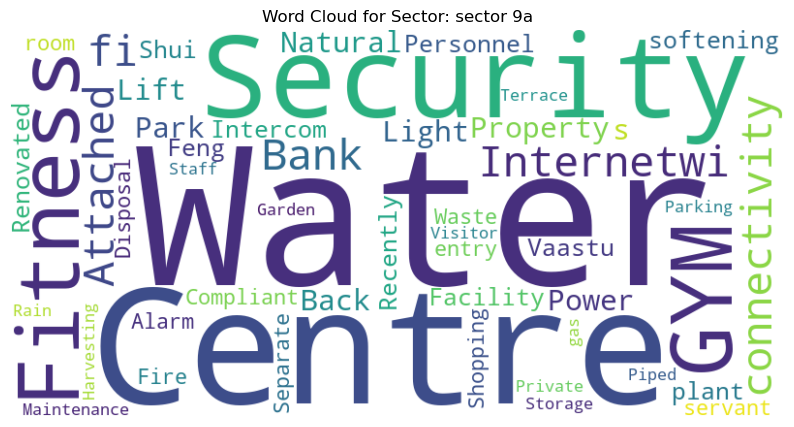

In [113]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(grouped_df[grouped_df['sector'] == 'manesar']['features'].values[0])
    
# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for Sector: {sector}')
plt.axis('off')
plt.show()